In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
df["trip_type"].unique()

array([3, 2, 1])

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)
mapping2 = {
    "OneWay": 1,
    "CircleTrip": 2,
    "RoundTrip": 3,
}

df["trip_type"] = df["trip_type"].map(mapping2)

In [ ]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
df.describe()

,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,2.982200,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,0.181559,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,3.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,3.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,3.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,3.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


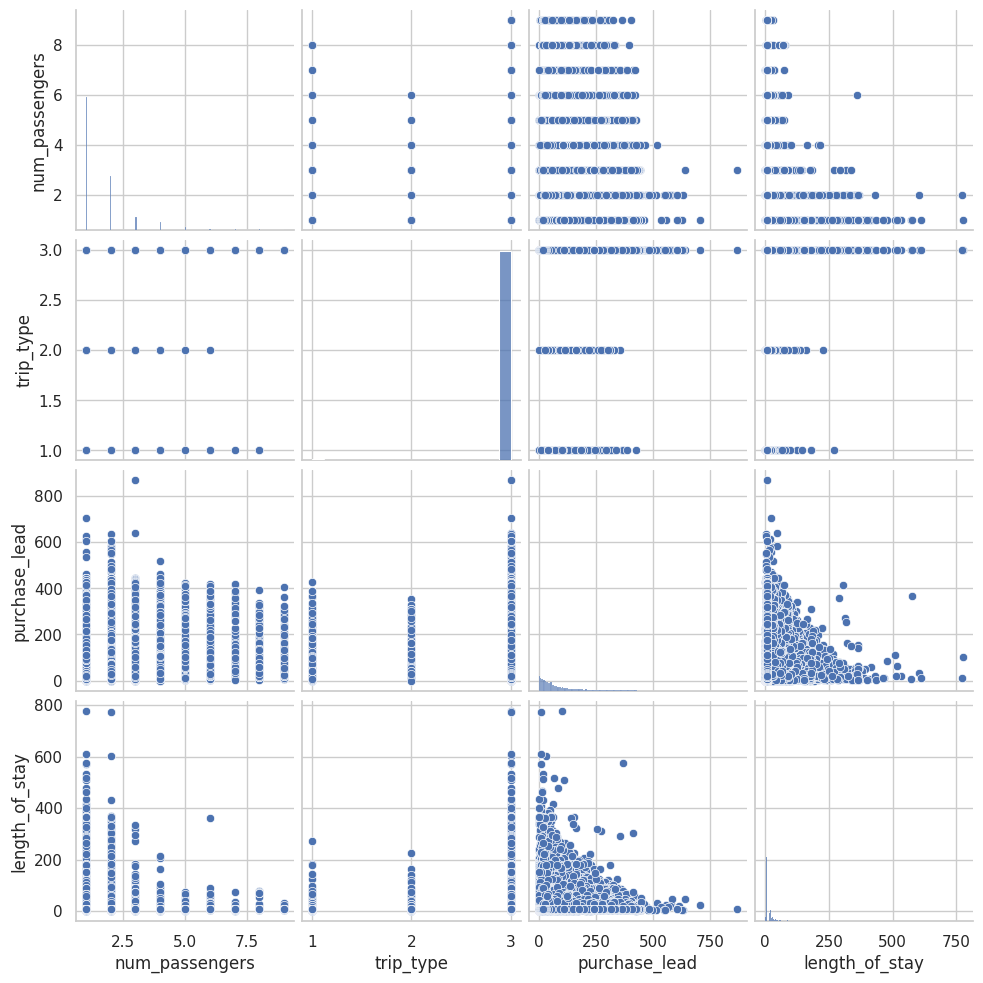

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')
cols=['num_passengers','trip_type','purchase_lead','length_of_stay','flight_day']
sns.pairplot(df[cols], height=2.5)
plt.show()

<Axes: >

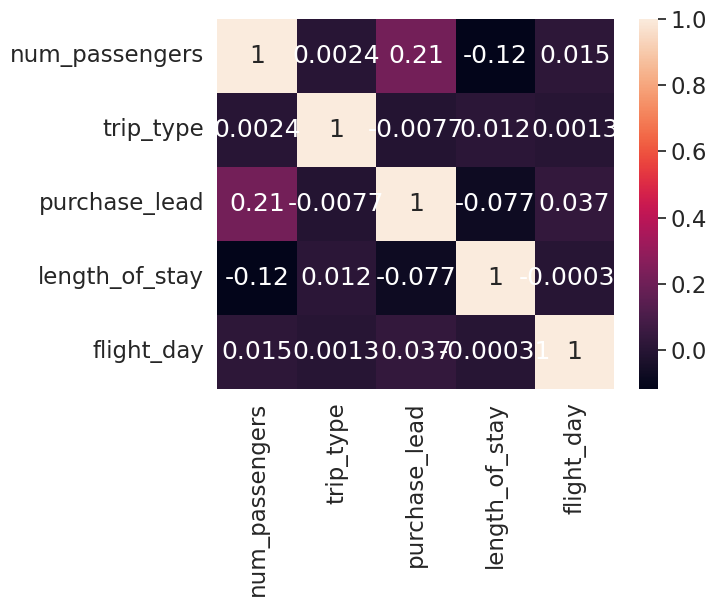

In [ ]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm,cbar=True,annot=True,yticklabels=cols,xticklabels=cols)

In [ ]:
pd.get_dummies(df[cols], columns=['trip_type','purchase_lead','length_of_stay'])


,num_passengers,flight_day,trip_type_1,trip_type_2,trip_type_3,purchase_lead_0,purchase_lead_1,purchase_lead_2,purchase_lead_3,purchase_lead_4,...,length_of_stay_510,length_of_stay_513,length_of_stay_517,length_of_stay_532,length_of_stay_573,length_of_stay_577,length_of_stay_603,length_of_stay_610,length_of_stay_773,length_of_stay_778
0,2,6,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,6,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,6,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,6,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,1,7,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,1,6,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
x_cols = list(set(df[cols])-set(['num_passengers']))
y_cols = list(['num_passengers'])

X = df[x_cols].values
Y = df[y_cols].values

X_train, X_test, Y_train, Y_test  = train_test_split(X,Y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(Y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
Y_train = sc_y.transform(Y_train)
Y_test = sc_y.transform(Y_test)

model = LinearRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)


In [ ]:
y_pred.shape

(12500, 1)

In [ ]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(Y_test,y_pred)
r2 = metrics.r2_score(Y_test,y_pred)
print("r2",r2.round(4))
print("mse:",mse.round(4))

r2 0.0565
mse: 0.9261


In [ ]:

!pip install setuptools==58
!pip install regressors


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 816.3/816.3 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
arviz 0.15.1 requires setuptools>=60.0.0, but you have setuptools 58.0.0 which is incompatible.
cvxpy 1.3.2 requires setuptools>65.5.1, but you have setuptools 58.0.0 which is incompatible.


  Using cached regressors-0.0.3.tar.gz (24 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for regressors: filename=regressors-0.0.3-py2.py3-none-any.whl size=12590 sha256=36af34f3fd06a39f5a29af74c6130746dacdd8ce9df337bfd645233f7a3bba15
  Stored in directory: /root/.cache/pip/wheels/85/e8/ec/b8fe5e2d41af2f4760b0d8ce1ae8f01c78df5d1b0883dee2fe
Successfully built regressors


In [ ]:
from regressors import stats
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [ ]:
Y_test = Y_test.reshape(-1)

print("=====================")
stats.summary(model, X_test,Y_test,x_cols)


Residuals:
    Min      1Q  Median     3Q   Max
-7.3507 -0.3998   0.425 0.5264 1.799


Coefficients:
                Estimate  Std. Error  t value   p value
_intercept      0.001097    0.008609   0.1274  0.898637
purchase_lead   0.202707    0.008772  23.1093  0.000000
length_of_stay -0.101911    0.008416 -12.1095  0.000000
flight_day      0.006916    0.008619   0.8024  0.422362
trip_type       0.009950    0.009053   1.0991  0.271734
---
R-squared:  0.05648,    Adjusted R-squared:  0.05618
F-statistic: 186.99 on 4 features


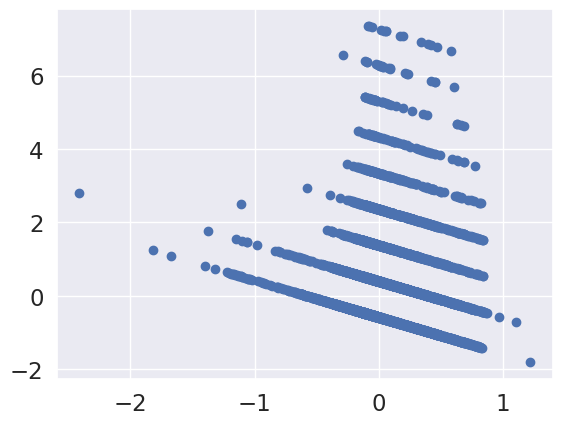

In [ ]:

residuals = np.subtract(Y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()